# Task 1: Object Classification

Nicholas Vella 0440803L \
This task uses the object detection models VGG16, VGG19 and ResNet50. As for the dataset it uses the test dataset in task 2.

1/1 [==============================] - 0s 127ms/step


1/1 [==============================] - 0s 79ms/step
VGG16 Accuracy: 43.33%
VGG19 Accuracy: 40.00%
ResNet50 Accuracy: 35.00%


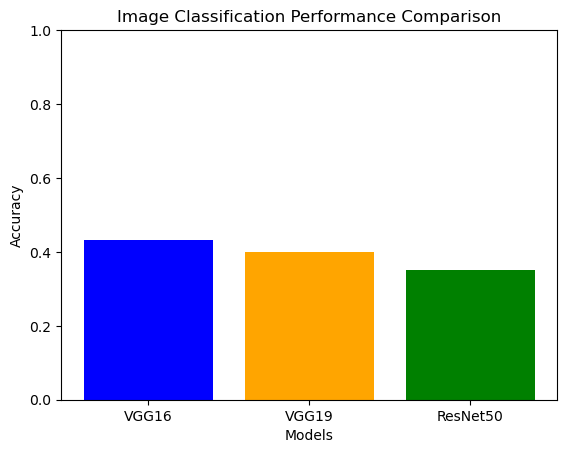

In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions, preprocess_input as preprocess_input_vgg16
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input as preprocess_input_vgg19
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input as preprocess_input_resnet50

# Function to get the top prediction for an image using a given model
def get_top_prediction(model, img_path, preprocess_function):
    # Adjust target_size to match the input shape of the model
    target_size = (224, 224)  # Adjust as needed
    
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_function(img_array)

    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions)

    # Get the label with the highest confidence
    top_prediction = decoded_predictions[0][0][1]
    
    return top_prediction

# Custom accuracy function
def custom_accuracy(y_true, y_pred):
    correct = 0
    total = len(y_true)

    for true_label, pred_label in zip(y_true, y_pred):
        # Use lowercase and remove underscores
        true_label = true_label.lower().replace('_', ' ')
        pred_label = pred_label.lower()

        if true_label in pred_label:
            correct += 1
        #else:
            #print(f"Mismatch: True Label: {true_label}, Predicted Label: {pred_label}")

    accuracy = correct / total
    return accuracy

# Directory containing your images
images_directory = r'C:\Users\Nicholas Vella\Documents\GitHub\ARI3129-Group-Project\Task 2\Images\test'

# Get all image file names in the directory
image_files = [f for f in os.listdir(images_directory) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Full paths to the images
image_paths = [os.path.join(images_directory, img_file) for img_file in image_files]

# Load pre-trained models
model_vgg16 = VGG16(weights='imagenet')
model_vgg19 = VGG19(weights='imagenet')
model_resnet50 = ResNet50(weights='imagenet')

# Initialize lists to store predictions and true labels
# Initialize lists to store predictions and true labels
true_labels = []
predictions_vgg16 = []
predictions_vgg19 = []
predictions_resnet50 = []

# Iterate over image paths and set the true label to "pizza" for all images
for img_path in image_paths:
    true_label = "pizza"
    true_labels.append(true_label)

    # Get top predictions using VGG16
    predictions_vgg16.append(get_top_prediction(model_vgg16, img_path, preprocess_input_vgg16))

    # Get top predictions using VGG19
    predictions_vgg19.append(get_top_prediction(model_vgg19, img_path, preprocess_input_vgg19))

    # Get top predictions using ResNet50
    predictions_resnet50.append(get_top_prediction(model_resnet50, img_path, preprocess_input_resnet50))


# Calculate accuracy scores for each model using the custom accuracy function
accuracy_vgg16 = custom_accuracy(true_labels, predictions_vgg16)
accuracy_vgg19 = custom_accuracy(true_labels, predictions_vgg19)
accuracy_resnet50 = custom_accuracy(true_labels, predictions_resnet50)

# Print accuracy scores
print(f"VGG16 Accuracy: {accuracy_vgg16:.2%}")
print(f"VGG19 Accuracy: {accuracy_vgg19:.2%}")
print(f"ResNet50 Accuracy: {accuracy_resnet50:.2%}")

# Plot a bar chart for performance comparison
models = ['VGG16', 'VGG19', 'ResNet50']
accuracies = [accuracy_vgg16, accuracy_vgg19, accuracy_resnet50]

plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Image Classification Performance Comparison')
plt.ylim(0, 1)  # Set y-axis limit to represent accuracy percentage
plt.show()
